In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Diameter of star(Ds) v/s Diameter of planet(Dp) 

In [3]:
df=pd.read_csv('1st plot ratio-1.csv')
dff=df.drop(['Ds/Dp','d/Ds'],axis=1)
dff

,pl_name (Exoplanet),hostname (Host star),pl_orbsmax (d),pl_rade (Dp),st_rad (Ds),Diameter of planet in terms of Earth's diameter,Diameter of star in terms of Sun's diameter
0,EPIC 201595106 b,EPIC 201595106,NaN,1.200,0.99,1.200,0.99
1,EPIC 201757695.02,EPIC 201757695,0.0296,0.908,0.66,0.908,0.66
2,EPIC 206024342 c,EPIC 206024342,NaN,1.400,1.10,1.400,1.10
3,EPIC 212587672 b,EPIC 212587672,NaN,1.260,0.98,1.260,0.98
4,EPIC 212624936 b,EPIC 212624936,NaN,1.200,0.93,1.200,0.93
...,...,...,...,...,...,...,...
670,Kepler-990 c,Kepler-990,0.0127,1.670,1.21,1.670,1.21
671,Kepler-997 b,Kepler-997,0.0400,1.070,1.19,1.070,1.19
672,Kepler-999 b,Kepler-999,0.0710,2.500,1.87,2.500,1.87
673,TOI-1860 b,TOI-1860,NaN,1.270,0.93,1.270,0.93


In [4]:
earth = ['Earth', 'sun', 1, 1, 1,1,1]
koi = ['KOI-4878.01', 'KOI-4878', 1.137, 1.04, 1.131,1,1]
lhs=['LHS 1140 b','LHS 1140',0.0957,1.635,1.730,1.635,1.730]
dff.loc[len(dff)] = earth
dff.loc[len(dff)]= koi
dff.loc[len(dff)]= lhs
dff['Ds/Dp']= (dff['st_rad (Ds)']/dff['pl_rade (Dp)'])*109.7522
dff['d/Ds']=  (dff['pl_orbsmax (d)']/dff['st_rad (Ds)'])*107.1428
dff


,pl_name (Exoplanet),hostname (Host star),pl_orbsmax (d),pl_rade (Dp),st_rad (Ds),Diameter of planet in terms of Earth's diameter,Diameter of star in terms of Sun's diameter,Ds/Dp,d/Ds
0,EPIC 201595106 b,EPIC 201595106,NaN,1.200,0.990,1.200,0.99,90.545565,NaN
1,EPIC 201757695.02,EPIC 201757695,0.0296,0.908,0.660,0.908,0.66,79.775828,4.805192
2,EPIC 206024342 c,EPIC 206024342,NaN,1.400,1.100,1.400,1.10,86.233871,NaN
3,EPIC 212587672 b,EPIC 212587672,NaN,1.260,0.980,1.260,0.98,85.362822,NaN
4,EPIC 212624936 b,EPIC 212624936,NaN,1.200,0.930,1.200,0.93,85.057955,NaN
...,...,...,...,...,...,...,...,...,...
673,TOI-1860 b,TOI-1860,NaN,1.270,0.930,1.270,0.93,80.369721,NaN
674,TOI-411 b,TOI-411,NaN,1.547,1.120,1.547,1.12,79.458606,NaN
675,Earth,sun,1.0000,1.000,1.000,1.000,1.00,109.752200,107.142800
676,KOI-4878.01,KOI-4878,1.1370,1.040,1.131,1.000,1.00,119.355517,107.711197


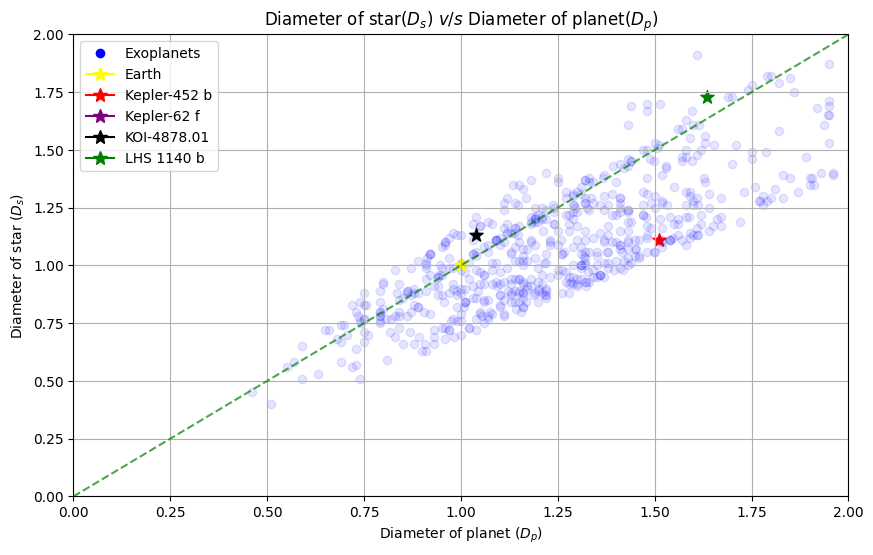

In [7]:
from matplotlib.lines import Line2D

plt.figure(figsize=(10, 6))
max_value = max(dff['st_rad (Ds)'].max(), dff['pl_orbsmax (d)'].max())

plt.plot([0, max_value], [0, max_value], color='green', linestyle='dashed', label='y = x',alpha=0.7)

# Iterate through the DataFrame and plot scatter points
for index, row in dff.iterrows():
    
    
    plt.scatter(row['pl_rade (Dp)'], row['st_rad (Ds)'], color='blue', alpha=0.1)

    # Highlight Kepler-452 b and Kepler-62f with special markers
    if row['pl_name (Exoplanet)'] == 'Earth':
        plt.scatter(row['pl_rade (Dp)'], row['st_rad (Ds)'], color='yellow', marker='*', s=100, label='Earth')
    if row['pl_name (Exoplanet)'] == 'Kepler-452 b':
        plt.scatter(row['pl_rade (Dp)'], row['st_rad (Ds)'], color='red', marker='*', s=100, label='Kepler-452 b')
    if row['pl_name (Exoplanet)'] == 'Kepler-62 f':
        plt.scatter(row['pl_rade (Dp)'], row['st_rad (Ds)'], color='purple', marker='*', s=100, label='Kepler-62 f')
    
    if row['pl_name (Exoplanet)']== 'KOI-4878.01':
        plt.scatter(row['pl_rade (Dp)'], row['st_rad (Ds)'], color='black', marker='*', s=100, label='KOI-4878.01')
    if row['pl_name (Exoplanet)']== 'LHS 1140 b':
        plt.scatter(row['pl_rade (Dp)'], row['st_rad (Ds)'], color='green', marker='*', s=100, label='KOI-4878.01')
        
# Plot the line y = x passing through the origin


# Create custom legend entries for different markers
legend_entry = Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Exoplanets')
legend_entry_1 = Line2D([0], [0], marker='*', color='yellow', markersize=10, label='Earth')
legend_entry_3 = Line2D([0], [0], marker='*', color='red', markersize=10, label='Kepler-452 b')
legend_entry_4 = Line2D([0], [0], marker='*', color='purple', markersize=10, label='Kepler-62 f')
legend_entry_5 = Line2D([0], [0], marker='*', color='black', markersize=10, label='KOI-4878.01')
legend_entry_6 = Line2D([0], [0], marker='*', color='green', markersize=10, label='LHS 1140 b')


# Set the x-axis and y-axis limits
plt.xlim(0, 2)
plt.ylim(0, 2)

# Add the custom legend entries along with the line legend
plt.legend(handles=[legend_entry, legend_entry_1,legend_entry_3, legend_entry_4,legend_entry_5,legend_entry_6], loc='upper left')

# Use LaTeX-style formatting for the axis labels
plt.xlabel('Diameter of planet ($D_p$)')
plt.ylabel('Diameter of star ($D_s$)')
plt.title('Diameter of star($D_s$) $v/s$ Diameter of planet($D_p)$')
plt.grid(True)
plt.savefig('exoplanet_plot.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Distance from star(d) v/s Diameter of star (Ds)

In [8]:
import pandas as pd
pd=pd.read_csv("2nd plot ratio-2.csv")
pdd=pd.drop(['Ds/Dp','d/Ds'],axis=1)
pdd

,pl_name (Exoplanet),hostname (Host star),pl_orbsmax (d),pl_rade (Dp),st_rad (Ds),Diameter of planet in terms of Earth's diameter,Diameter of star in terms of Sun's diameter
0,30 Ari B b,30 Ari B,1.0100,NaN,1.13,0.00,1.13
1,55 Cnc f,55 Cnc,0.7920,NaN,0.96,0.00,0.96
2,7 CMa b,7 CMa,1.9000,NaN,2.30,0.00,2.30
3,BD+14 4559 b,BD+14 4559,0.7800,NaN,0.86,0.00,0.86
4,GJ 3293 c,GJ 3293,0.3640,NaN,0.40,0.00,0.40
...,...,...,...,...,...,...,...
130,Kepler-712 c,Kepler-712,0.6820,4.41,0.72,4.41,0.72
131,Kepler-87 c,Kepler-87,1.3423,4.96,1.29,4.96,1.29
132,Kepler-967 c,Kepler-967,0.5680,2.86,0.63,2.86,0.63
133,PH2 b,PH2,0.8360,8.98,0.91,8.98,0.91


In [11]:
earth = ['Earth', 'sun', 1, 1, 1,1,1]
koi = ['KOI-4878.01', 'KOI-4878', 1.137, 1.04, 1.131,1,1]
lhs=['LHS 1140 b','LHS 1140',0.0957,1.635,1.730,1.635,1.730]
pdd.loc[len(pdd)] = earth
pdd.loc[len(pdd)]= koi
pdd.loc[len(pdd)]= lhs
pdd['Ds/Dp']= (pdd['st_rad (Ds)']/pdd['pl_rade (Dp)'])*109.7522
pdd['d/Ds']=  (pdd['pl_orbsmax (d)']/pdd['st_rad (Ds)'])*107.1428
pdd


ValueError: cannot set a row with mismatched columns

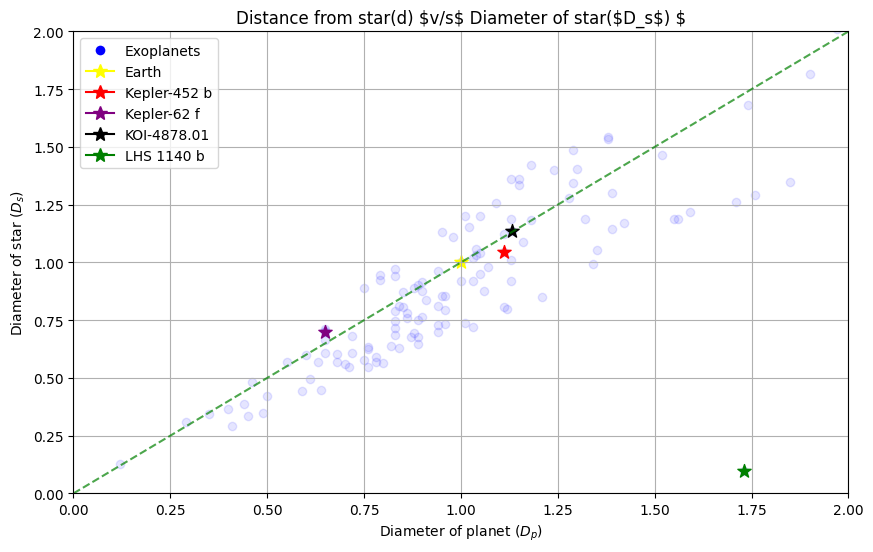

In [39]:
from matplotlib.lines import Line2D

plt.figure(figsize=(10, 6))
max_value = max(pdd['st_rad (Ds)'].max(), pdd['pl_orbsmax (d)'].max())

plt.plot([0, max_value], [0, max_value], color='green', linestyle='dashed', label='y = x',alpha=0.7)


# Iterate through the DataFrame and plot scatter points
for index, row in pdd.iterrows():
    
    
    plt.scatter(row['st_rad (Ds)'], row['pl_orbsmax (d)'], color='blue', alpha=0.1)

    # Highlight Kepler-452 b and Kepler-62f with special markers
    if row['pl_name (Exoplanet)'] == 'Earth':
        plt.scatter(row['st_rad (Ds)'], row['pl_orbsmax (d)'], color='yellow', marker='*', s=100, label='Kepler-452 b')
    if row['pl_name (Exoplanet)'] == 'Kepler-452 b':
        plt.scatter(row['st_rad (Ds)'], row['pl_orbsmax (d)'], color='red', marker='*', s=100, label='Kepler-452 b')
    if row['pl_name (Exoplanet)'] == 'Kepler-62 f':
        plt.scatter(row['st_rad (Ds)'], row['pl_orbsmax (d)'], color='purple', marker='*', s=100, label='Kepler-62 f')
    
    if row['pl_name (Exoplanet)']== 'KOI-4878.01':
        plt.scatter(row['st_rad (Ds)'], row['pl_orbsmax (d)'], color='black', marker='*', s=100, label='KOI-4878.01')
    if row['pl_name (Exoplanet)']== 'LHS 1140 b':
        plt.scatter(row['st_rad (Ds)'], row['pl_orbsmax (d)'], color='green', marker='*', s=100, label='KOI-4878.01')
        
# Plot the line y = x passing through the origin

# Create custom legend entries for different markers
legend_entry = Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Exoplanets')
legend_entry_1 = Line2D([0], [0], marker='*', color='yellow', markersize=10, label='Earth')
legend_entry_3 = Line2D([0], [0], marker='*', color='red', markersize=10, label='Kepler-452 b')
legend_entry_4 = Line2D([0], [0], marker='*', color='purple', markersize=10, label='Kepler-62 f')
legend_entry_5 = Line2D([0], [0], marker='*', color='black', markersize=10, label='KOI-4878.01')
legend_entry_6 = Line2D([0], [0], marker='*', color='green', markersize=10, label='LHS 1140 b')


# Set the x-axis and y-axis limits
plt.xlim(0, 2)
plt.ylim(0, 2)

# Add the custom legend entries along with the line legend
plt.legend(handles=[legend_entry,legend_entry_1,legend_entry_3, legend_entry_4,legend_entry_5,legend_entry_6], loc='upper left')

# Use LaTeX-style formatting for the axis labels
plt.xlabel('Diameter of planet ($D_p$)')
plt.ylabel('Diameter of star ($D_s$)')
plt.title('Distance from star(d) $v/s$ Diameter of star($D_s$) $')
plt.grid(True)
plt.savefig('exoplanet_plot.pdf', format='pdf', bbox_inches='tight')
plt.show()